In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [60]:
df.shape

(614, 13)

In [61]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [64]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df=df.dropna()

In [66]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

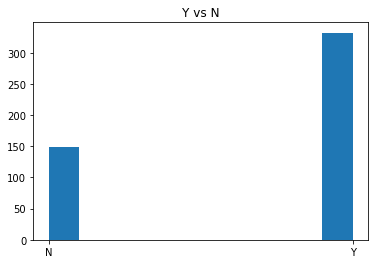

Y    332
N    148
Name: Loan_Status, dtype: int64

In [68]:
df["Loan_Status"].hist(grid=False)
plt.title("Y vs N")
plt.show()
df["Loan_Status"].value_counts()

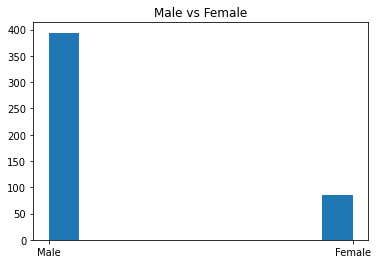

Male      394
Female     86
Name: Gender, dtype: int64

In [69]:
df["Gender"].hist(grid=False)
plt.title("Male vs Female")
plt.show()
df["Gender"].value_counts()

In [70]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Gender"]=LE.fit_transform(df["Gender"])
df["Gender"].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [71]:
LE.inverse_transform([1,0])

array(['Male', 'Female'], dtype=object)

In [73]:
df["Married"]=LE.fit_transform(df["Married"])
df["Married"].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [74]:
LE.inverse_transform([1,0])

array([1, 0])

In [75]:
df["Education"]=LE.fit_transform(df["Education"])
df["Education"].value_counts()

0    383
1     97
Name: Education, dtype: int64

In [76]:
LE.inverse_transform([1,0])

array(['Not Graduate', 'Graduate'], dtype=object)

In [77]:
df["Self_Employed"]=LE.fit_transform(df["Self_Employed"])
df["Self_Employed"].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [78]:
LE.inverse_transform([1,0])

array(['Yes', 'No'], dtype=object)

In [79]:
df["Property_Area"]=LE.fit_transform(df["Property_Area"])
df["Property_Area"].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [80]:
LE.inverse_transform([0,1,2])

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [81]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160
CoapplicantIncome,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000


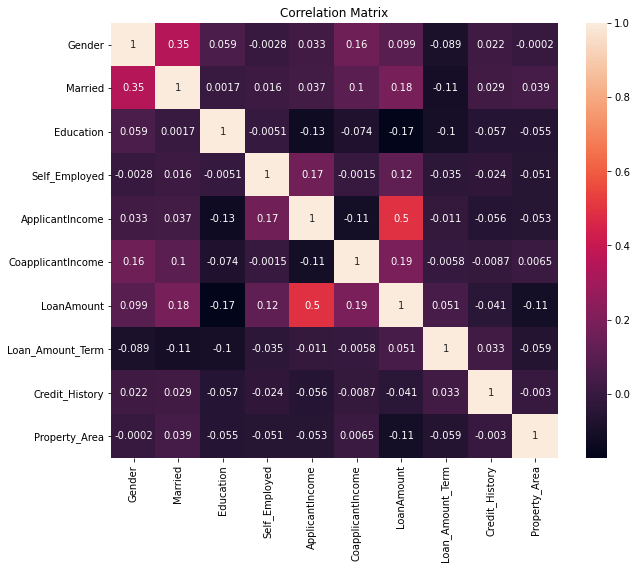

In [22]:
import seaborn as sns
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [82]:
df.skew()

Gender              -1.678471
Married             -0.621334
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
dtype: float64

In [83]:
#Observaions
#No missing Values
#Appropraite encoding technique applied
#Outliers exists in the following columns Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,
#Loan_Amount_Term,Credit History

In [89]:
#Applied Zcore for continous data columns to remove skewness
from scipy.stats import zscore
z_score=zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,0.807107,0.624365,0.197970,0.116751,4337.857868,1267.155127,132.961929,361.827411,0.865482,1.000000
std,0.395072,0.484902,0.398976,0.321532,2220.999352,1412.454010,52.666468,24.143563,0.341642,0.771635
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,240.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2785.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3750.000000,1146.500000,125.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5308.250000,2153.250000,160.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,13262.000000,6250.000000,312.000000,480.000000,1.000000,2.000000


In [90]:
df.skew()

Gender              -1.562620
Married             -0.515568
Education            1.521754
Self_Employed        2.396055
ApplicantIncome      1.341813
CoapplicantIncome    0.913060
LoanAmount           0.795786
Loan_Amount_Term     2.597516
Credit_History      -2.150481
Property_Area        0.000000
dtype: float64

In [103]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int64
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
dtype: object

In [105]:
df['Loan_Id'] = pd.to_numeric(df['Loan_ID'],errors='coerce')

In [106]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int64
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
Loan_Id              float64
dtype: object

In [93]:
x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [101]:
#Checking for model accuracy using Logistic Regression techniques
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#Model Instantiation and Training


In [102]:
from time import time
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=300)
#Checking the training and testing time
start=time()
knn.fit(x_train,y_train)
print("The training time :" (time() -start))
start=time()
y_pred=knn.predict(x_test)
print("The testing time :" (time() -start))

ValueError: could not convert string to float: 'LP002543'